In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# Import Data

In [7]:
address1 = '/Users/foppong/Desktop/Data Analyses/partynyc/bar_locations.csv'
address2 = '/Users/foppong/Desktop/Data Analyses/partynyc/party_in_nyc.csv'

# Import data as a dataframe
bar_locations = pd.read_csv(address1)
incident_locations = pd.read_csv(address2)

# Data Munging

In [8]:
# head() returns only the frist 5 rows of your dataset, other commands include tail() and sample(5)
bar_locations.head()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


In [10]:
incident_locations.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [11]:
# Comparing with scalars. Number of calls column is most applicable here
bar_locations.sample(10) > 10

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
883,True,True,True,True,True,False,True
1594,True,True,True,True,True,False,True
430,True,True,True,True,True,False,True
1296,True,True,True,True,True,False,True
1159,True,True,True,True,True,False,True
799,True,True,True,True,True,False,True
559,True,True,True,True,True,False,True
2002,True,True,True,True,True,False,True
185,True,True,True,True,True,False,True
1643,True,True,True,True,True,False,True


In [12]:
# Figuring out what data is missing
bar_locations.isnull()

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [13]:
# Filtering out missing values
bar_locations_no_NaN = bar_locations.dropna()

In [14]:
incident_locations_no_NAN = incident_locations.dropna()

In [15]:
# Remove duplicates
bar_locations_clean = bar_locations_no_NaN.drop_duplicates()
incidents_clean = incident_locations_no_NAN.drop_duplicates()
incidents_clean.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


# PCA 

#### Selecting subset of dataframe applicable for PCA

In [16]:
incidents_clean_subset = incidents_clean[['Incident Zip', 'Latitude', 'Longitude']]
incidents_clean_subset.head()

,Incident Zip,Latitude,Longitude
0,10034.0,40.866183,-73.918930
1,10040.0,40.859324,-73.931237
2,10026.0,40.799415,-73.953371
3,11231.0,40.678285,-73.994668
4,10033.0,40.850304,-73.938516


#### Convert pandas dataframe to a numpy ndarray

In [17]:
variable_names = list(incidents_clean_subset.columns.values)
variable_names

['Incident Zip', 'Latitude', 'Longitude']

In [20]:
X = incidents_clean_subset

In [21]:
pca = decomposition.PCA()

In [22]:
bar_locations_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([9.99999977e-01, 1.89743234e-08, 4.00190022e-09])

In [23]:
pca.explained_variance_ratio_.sum()

1.0

In [24]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,Incident Zip,Latitude,Longitude
0,-1.000000,0.000089,-0.000041
1,-0.000039,-0.748643,-0.662973
2,-0.000089,-0.662973,0.748643


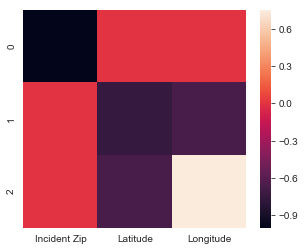

In [25]:
# Correlation heatmap to see how the dataset variables correlate with the 
# principal components
sb.heatmap(comps)